# Qiskit 1.x Tutorial 3 Hello World

&copy; 2024 by [Damir Cavar](http://damir.cavar.me/)


This tutorial and example code is based on the Qiskit 1.x tutorial videos.

- [Tutorial 3: Hello World](https://youtu.be/93-zLTppFZw)

It describes the Hello World example implementation on a 2-qubit Bell state.

Install the necessary Qiskit packages for the tutorials using:

The following imports the Qiskit Python module and a local file called `secret.py`. In the `secret.py` file I tend to store my API key. It is excluded from the repo via an entry in the file `.gitignore`.

In [11]:
import qiskit
import secret

## Generating the Bell state

We apply the [Hadamard gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.HGate) on the first qubit and the [CX gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#cx) (or CNOT gate) to the first and second qubits.

Creating a quantum circuit with 2 qubits:

In [12]:
qc = qiskit.QuantumCircuit(2)

The first qubit is put into a superposition by applying the [Hadamard gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.HGate). Executing the single qubit [Hadamard gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.HGate) on the first qubit:

In [13]:
qc.h(0)

The [CX gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#cx) uses the first qubit as a control qubit and the second as the target qubit.

In [14]:
qc.cx(0, 1)

We can draw the circuit using the following [QuantumCircuit draw](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#draw) function:

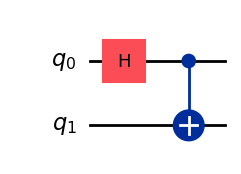

In [15]:
x = qc.draw(output='mpl')

What does this mean? The Bell state is a specific type of an entangled quantum state with two qubits. Quoting [Pennylane](https://pennylane.ai/qml/glossary/what-are-bell-states/): "Bell states are quantum states of two qubits that represent simple examples of quantum entanglement. When one of the two qubits is measured, it takes on a specific value, and the second qubit is forced to also take on a specific value, as the entangled state collapses. (...) If qubit `x` starts with a state of `|0⟩`, the Hadamard gate puts it into a superposition of `|0⟩` and `|1⟩`. The CNOT gate flips qubit `y` depending on the state of qubit `x`, but since qubit `x` is in a superposition of `|0⟩` and `|1⟩` this makes the final state of qubit `y` dependent on what the final state of qubit `x` turns out to be — thus the two qubits are part of an entangled state."

## Observables

Measurements in the basis of [Pauli operators](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Pauli#pauli) for observables correspond to measuring certain physical properties of qubits, such as their state in the X, Y, or Z direction. I is the identity operator.

In [16]:
from qiskit.quantum_info import Pauli

We are creating operators and encoding for each qubit the the operator applied to it. In our case we got two qubits:

In [21]:
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')
observables = [ZZ, ZI, IZ, XX, XI, IX]

What do the Pauli operators do?

Applied to a single qubit:

- X is the Bit-Flip Operator: swapping the amplitudes of the `|0>` and `|1>` states. `|0>` becomes `|1>` and `|1>` becomes `|0>`.
- Y is the Phase-Flip Operator: swapping the amplitudes of the `|0⟩` and `|1⟩` states and adding a phase factor of `i`. If the qubit is in state `|0⟩`, it will be transformed to `i∣1⟩`, and if it is in state `|1⟩`, it will be transformed to `−i∣0⟩`. (`i` is the imaginary unit, meaning, `|0>` is flipped to `|1>` and then multiplied with `i` resulting in a `90`-degree phase shift in the [Complex Plane](https://en.wikipedia.org/wiki/Complex_plane). For `|1>` is flipped to `|0>` and multiplied with `-i` resulting in a `-90`-degree phase shift in the [Complex Plane](https://en.wikipedia.org/wiki/Complex_plane).)
- Z is the Phase Operator: changing the sign of the amplitude of the `|1⟩` state while leaving the `|0⟩` state unchanged.
A qubit in state `|0⟩` remains in `|0⟩`. A qubit in state `|1⟩` is transformed to `−∣1⟩`.
- I is the identity operator, leaving the qubit in the state it is.



## Optimization

NA


## Execution

Here we will be using the [Qiskit Aer](https://qiskit.github.io/qiskit-aer/) quantum computing simulator. [Aer](https://qiskit.github.io/qiskit-aer/) comes with realistic noise models and can be set to run via [CUDA](https://developer.nvidia.com/cuda-toolkit) on GPUs. See for more details: [qiskit-aer on GitHub](https://github.com/Qiskit/qiskit-aer).

In [18]:
from qiskit_aer.primitives import Estimator

We instantiate an Estimator:

In [19]:
estimator = Estimator()

We run the estimator on six quantum circuits for the six observables, a quantum circuit for each:

In [23]:
job = estimator.run([qc] * len(observables), observables)

We print the results:

In [24]:
job.result()

EstimatorResult(values=array([ 1.       ,  0.0078125,  0.0078125,  1.       , -0.0390625,
       -0.0390625]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0044942, 'sample_measure_time': 0.0009563, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 114595, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 24, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.99993896484375, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0044942, 'sample_measure_time': 0.0009563, 'i

## Plotting the Results
